## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import emoji
import autocorrect ## Has to be installed
from textblob import TextBlob ## Has to be installed
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
## nltk.download('punkt')
from nltk.corpus import stopwords
## nltk.download('stopwords')
## nltk.download('vader_lexicon')
from nltk.stem import PorterStemmer,WordNetLemmatizer,LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
## pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay

## Loading the Data

In [2]:
yonex = pd.read_csv("yonex.csv")

## Numerical Feature Extraction

In [3]:
vector = CountVectorizer()

In [4]:
vector.fit_transform(yonex['Review text']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
def polarity(n):
    return analyzer.polarity_scores(n)['compound']

In [8]:
yonex['Emotion'] = yonex['Review text'].apply(polarity)

In [9]:
yonex['Emotion']

0       0.9110
1      -0.4767
2      -0.8591
3       0.8979
4       0.2500
         ...  
8503   -0.4404
8504    0.2023
8505    0.0000
8506    0.0000
8507    0.4215
Name: Emotion, Length: 8508, dtype: float64

In [10]:
def sentiment(n):
    if n <= 0.3:
        return 'Negative'
    else:
        return 'Positive'

In [11]:
yonex['Emotion'] = yonex['Emotion'].apply(sentiment)

<Axes: >

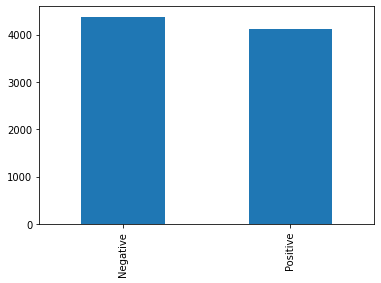

In [12]:
yonex['Emotion'].value_counts().plot(kind = 'bar')

In [13]:
df = pd.concat([yonex['Review text'],yonex['Emotion']],axis=1)

In [14]:
df

,Review text,Emotion
0,nice product good quality price rising bad sig...,Positive
1,it supplied one davis outside cover one ad ins...,Negative
2,worst product damaged shuttlecocks packed new ...,Negative
3,quite k nowadays quality corks like years back...,Positive
4,pricedjust retailer it understand wat advantag...,Negative
...,...,...
8503,wrist duplicate produced it buy seller product...,Negative
8504,received product intact sealedread,Negative
8505,delivered time price high marketread,Negative
8506,mark available market less priceread,Negative


In [15]:
df['Emotion'].value_counts()

Negative    4378
Positive    4130
Name: Emotion, dtype: int64

In [16]:
X=df['Review text']
y=df['Emotion']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
pipe=Pipeline([('Vectorization',CountVectorizer(stop_words='english')),
              ("Estimator",MultinomialNB(alpha=3))])

In [19]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorization', CountVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=3))])

In [20]:
y_pred = pipe.predict(X_test)

In [21]:
accuracy_score(y_test,y_pred)

0.9030552291421856

In [22]:
f1_score(y_test, y_pred, average='weighted')

0.902649272479265

In [23]:
pipe.predict(['Waste Product'])

array(['Negative'], dtype='<U8')

### Creating a pickle file

In [24]:
import pickle
pickle.dump(pipe,open("sentiment_yonex.pkl","wb"))

In [25]:
import os
os.getcwd()

'C:\\Users\\Rahul\\Desktop\\Internship\\TASK 9'

In [26]:
predict = pickle.load(open("sentiment_yonex.pkl","rb"))

In [27]:
predict.predict(['This is so good'])[0]

'Positive'

In [28]:
predict.predict(['This is a bad product'])[0]

'Negative'